# Signature detection using Image Processing Technique

### LIbrary imports

In [507]:
from io import BytesIO
from IPython.display import Image as IMG
from  PIL import Image
# import re

In [508]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
import numpy as np


### Basic image display Function

In [509]:
def show(img):
    cv2.imshow("", img)    
    cv2.waitKey()           
    cv2.destroyAllWindows()

def plt_disp(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

def disp(a, fmt='jpeg'):
    a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
    f = BytesIO()
    Image.fromarray(a).save(f, fmt)
    display(IMG(data=f.getvalue()))

## Signature detection


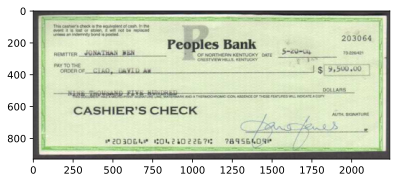

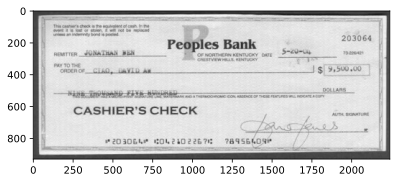

In [510]:
image = cv2.imread("/home/aritrarc/Downloads/1.jpeg")
# image = cv2.imread('../images/signatureDocuments/0.jpeg')
plt_disp(image)
# Gray Scale Conversion 

img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# img=cv2.bilateralFilter(img,35, 105, 105)

# Binary Scale Conversion

# img = cv2.threshold(img, 107, 255, cv2.THRESH_BINARY)[1]  
plt_disp(img)


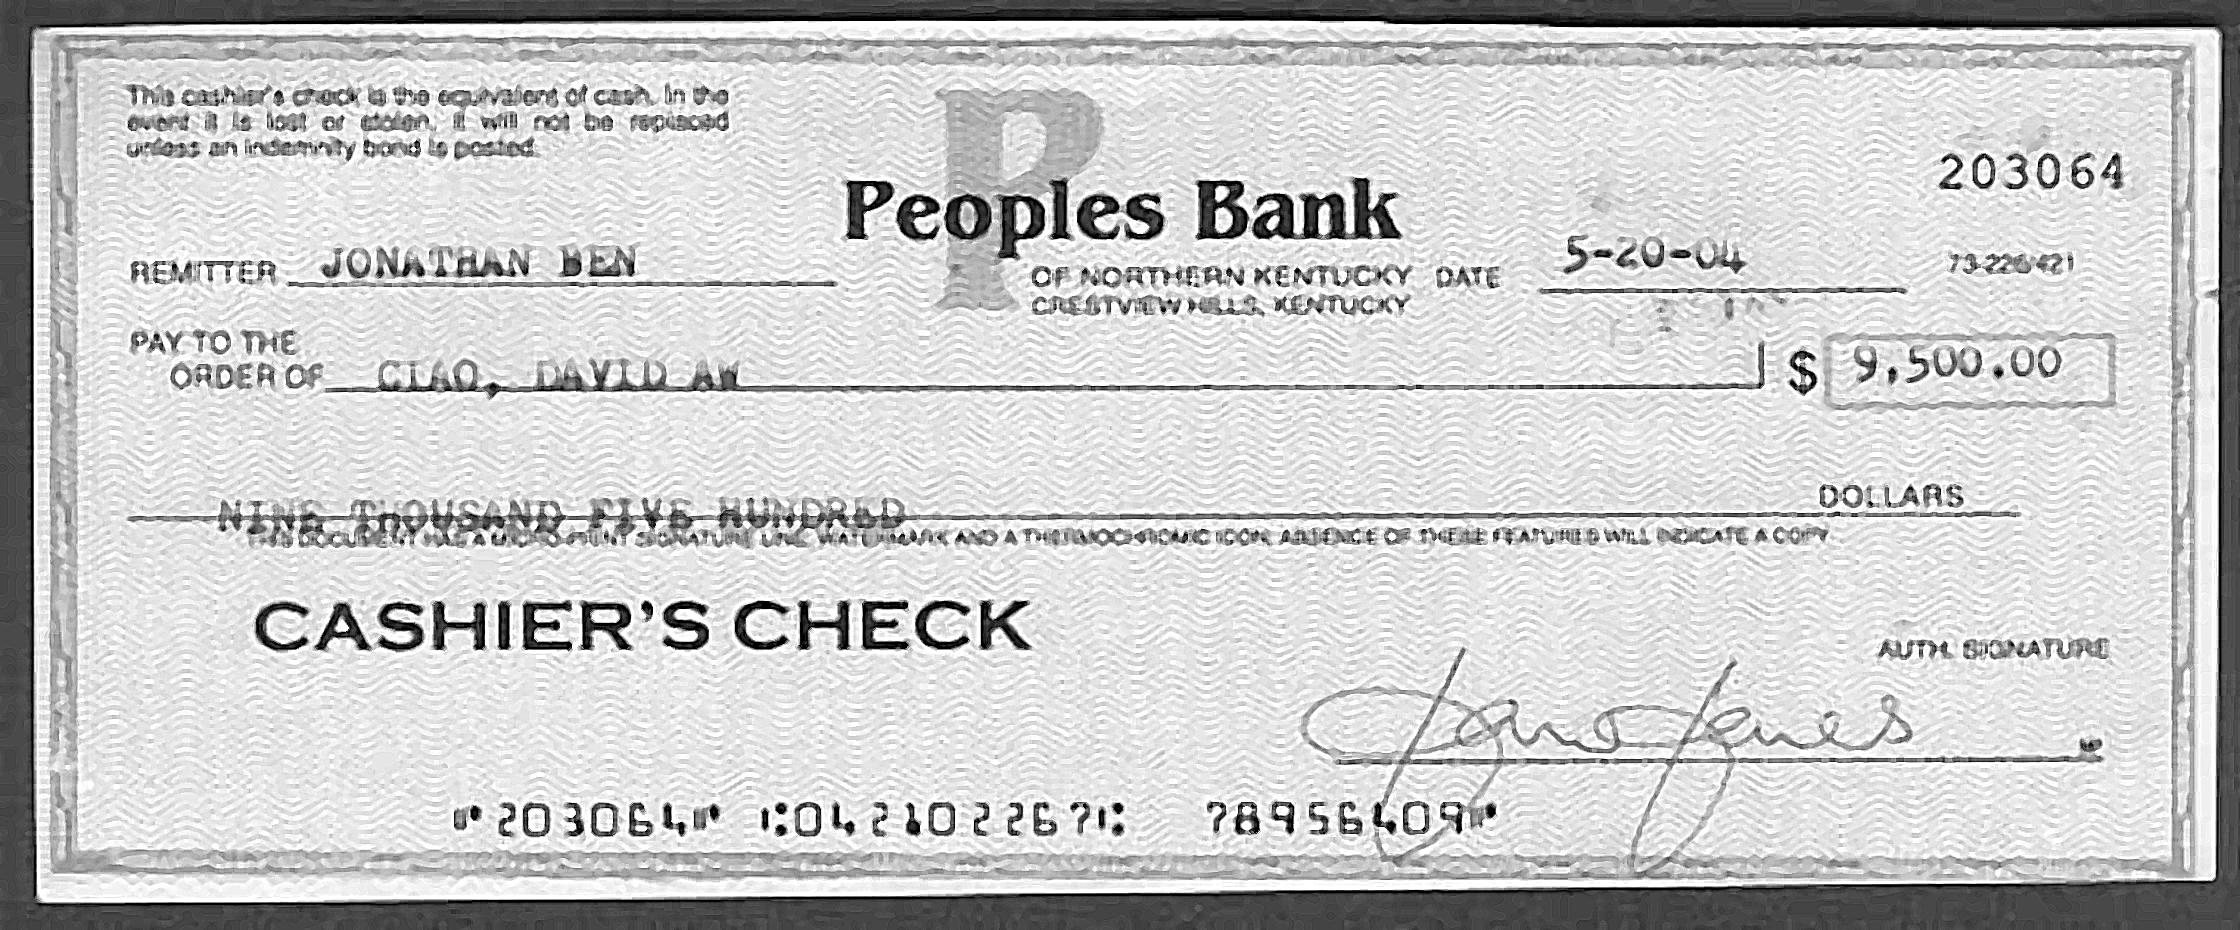

In [511]:
# Sharping Image 
img =cv2.medianBlur(img,7)
g= cv2.GaussianBlur(img, (7,7),2)
img = cv2.addWeighted(img,7,g,-6, 0)

disp(img)

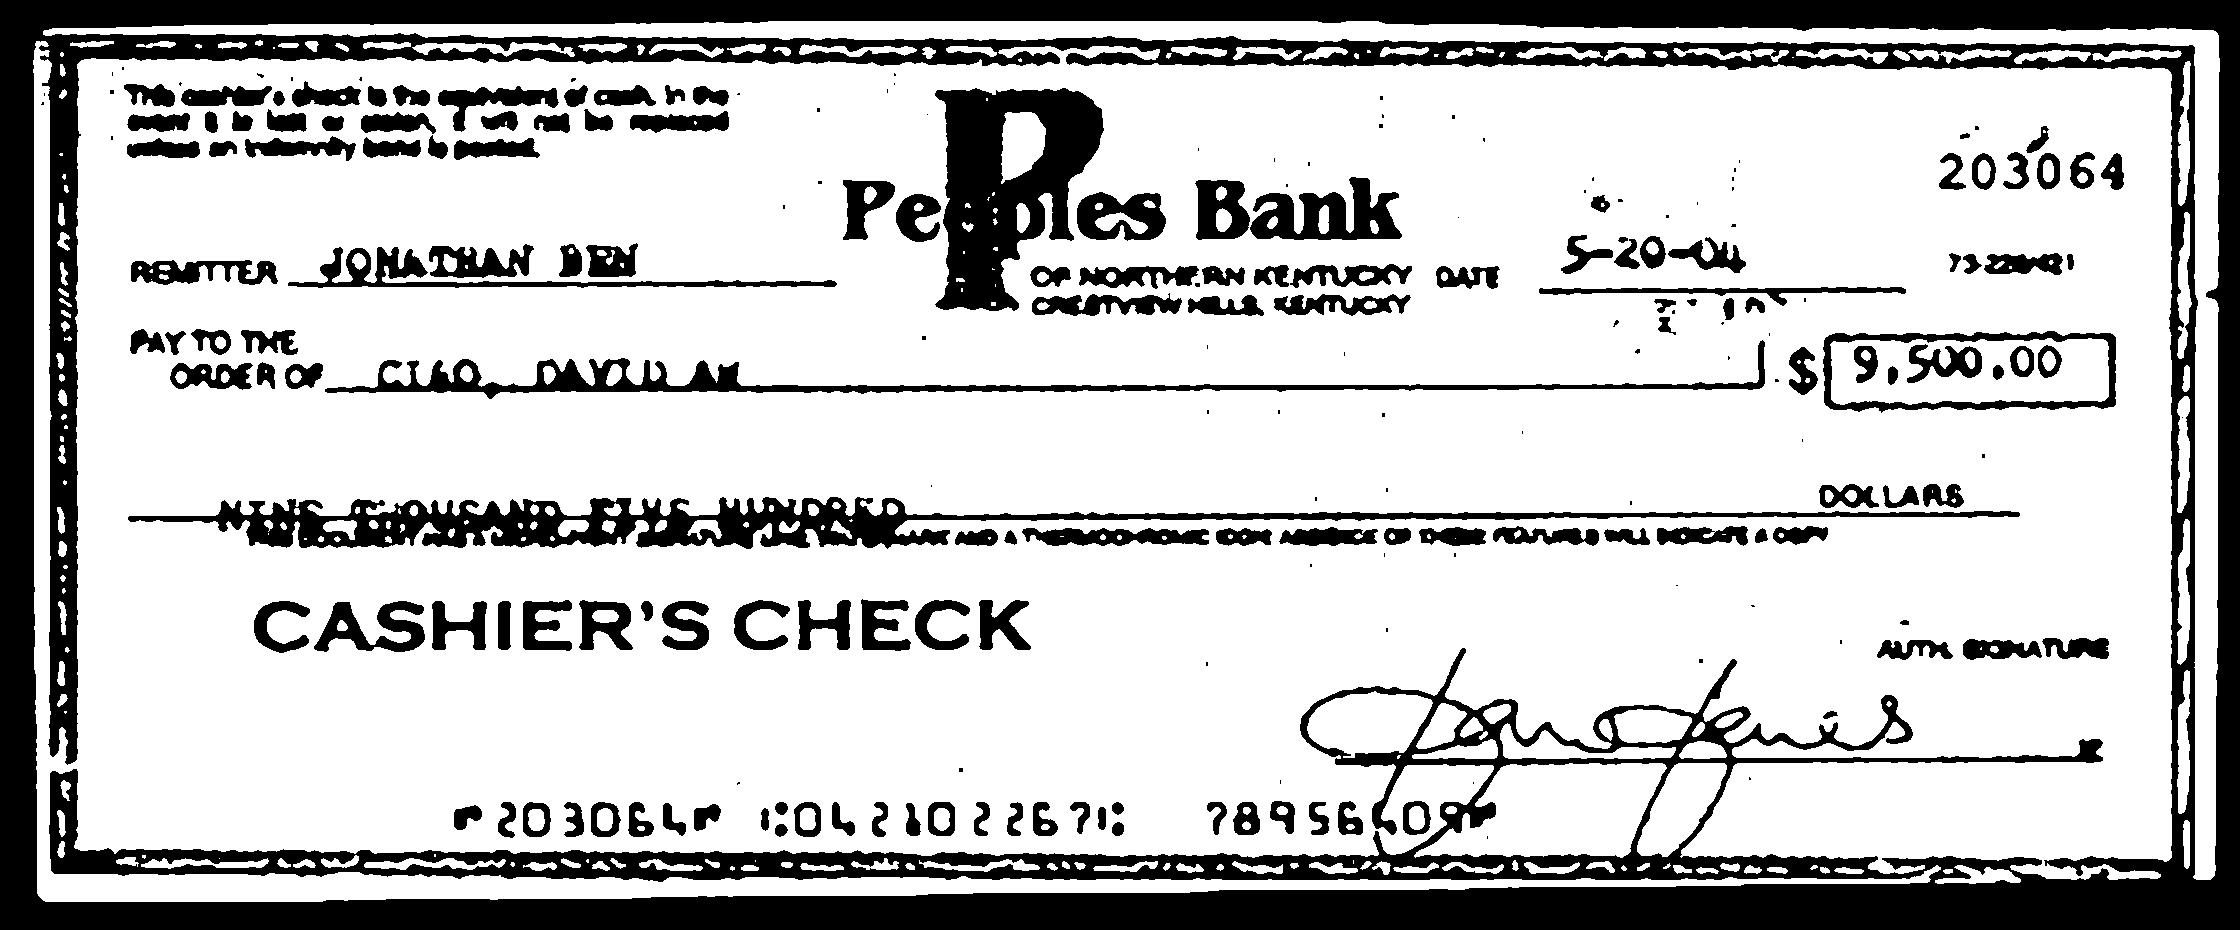

In [512]:
img = cv2.threshold(img,200, 255, cv2.THRESH_BINARY)[1] 
img = cv2.medianBlur(img,7)
disp(img)

In [513]:
# Outline Reduction 
# u,v = img.shape
# A= np.ones((u,v), dtype=np.uint8)*255
# A[50:u-50, 50:v-50] = img[50:u-50, 50:v-50]
# img = A

### Connected Component Detection

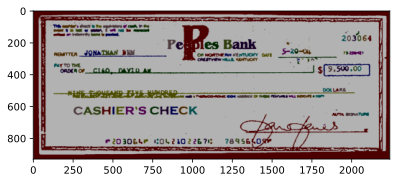

In [514]:
# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)
plt.imshow(image_label_overlay)


### Feature Extraction

In [515]:
mean_area = 0
counter = 0
for region in measure.regionprops(blobs_labels):
    if (region.area > 10):
        mean_area = mean_area + region.area
        counter = counter + 1
mean_area = (mean_area/counter)
mean_area

2928.110465116279

In [516]:

min_outliar = (mean_area*2.97619)+100
max_outliar = min_outliar*18

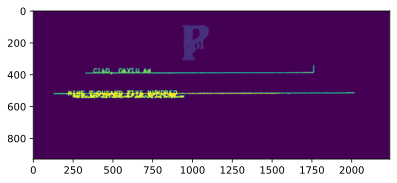

In [517]:
img = morphology.remove_small_objects(blobs_labels, min_outliar) 
small_mask = np.bincount(img.reshape(-1)) > max_outliar  
img[small_mask[img]] = 0
plt.imshow(img)

In [518]:
img = (img/img.max())*255


In [367]:
np.unique(img).max(),np.unique(img).min(),len(np.unique(img)),np.round(img.mean())

(255.0, 0.0, 115, 5.0)

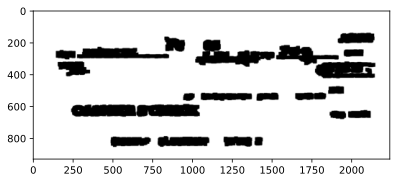

In [368]:

img=np.array(img,np.uint8)
img = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY_INV)[1]
img = cv2.erode(img, np.ones((21,21)),50)

plt_disp(img)

### Drawing Boundary

13


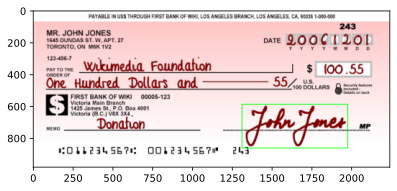

In [118]:
contour,_ = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contour = sorted(contour,key =cv2.contourArea)[:-1]
print(len(contour))
c = max(contour,key =cv2.contourArea)
x,y,w,h =cv2.boundingRect(c)
img = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img)

## Converting into a function

In [272]:
def signature_detection(image:np.ndarray,output=None) -> None:
    # Gray Scale Conversion 
    img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # smoothing
    # img=cv2.bilateralFilter(img,35, 105, 105)
    # Binary Scale Conversion
    img = cv2.threshold(img, 115, 255, cv2.THRESH_BINARY)[1] 
    # Connected Reagion Detection   
    blobs_labels = measure.label((img > img.mean()), background=1)
    # Mean Area calculation
    mean_area = 0; counter = 0   
    for region in measure.regionprops(blobs_labels):
        if (region.area > 10):
            mean_area = mean_area + region.area
            counter = counter + 1
    mean_area = (mean_area/counter)
    # Min_Max_outliar calculation
    min_outliar = (mean_area*2.9762)+100
    max_outliar = min_outliar*18    
    # Removing Outliar 
    img = morphology.remove_small_objects(blobs_labels, min_outliar) 
    small_mask = np.bincount(img.reshape(-1)) > max_outliar  
    img[small_mask[img]] = 0
    # Normalization
    img = np.array((img/img.max())*255,np.uint8)
    # Binary image Conversion
   
    thresh = 100+(img.mean()**2)*(100/255)*2

    img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV)[1]
    # Erode image to find signature
    img = cv2.erode(img, np.ones((21,21)),50)
    # Contour detection
    contour = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)[0]    
    c = sorted(contour,key =cv2.contourArea)[-2]
    # Boundary Drawing    
    x,y,w,h =cv2.boundingRect(c)
    img = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    # disp(img)
    cv2.imwrite(output, img)


In [273]:
img = cv2.imread('../images/signatureDocuments/9.png')
signature_detection(img)

error: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:692: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


## Multiple Result of Function 

In [288]:
base_dir = '../images/signatureDocuments'
result= '../result'

In [289]:
import os 
l=[]
for i in os.listdir(base_dir):
    l+=[i]
k=0
for i in l:    
    try:
        img = cv2.imread(os.path.join(base_dir,i))
        signature_detection(img, f"{result}/{i}")
    except:
        pass
    

/tmp/ipykernel_36154/2272441338.py:25: RuntimeWarning: invalid value encountered in divide
  img = np.array((img/img.max())*255,np.uint8)
/tmp/ipykernel_36154/2272441338.py:25: RuntimeWarning: invalid value encountered in cast
  img = np.array((img/img.max())*255,np.uint8)


#### Reference 
https://stackoverflow.com/questions/72001569/signature-detection-from-a-jpeg-file-code-setup